In [1]:
%matplotlib inline

In [2]:
%matplotlib inline  
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
### Some necesary installs:

!pip install tensorflow_addons

In [4]:
### Usual imports:
import pandas as pd
import sympy
import math
import cmath
import numpy as np
import numpy.polynomial.polynomial as p
import matplotlib.pyplot as plt
import seaborn as sns
import re
import skimage.io
import time
import unittest
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy import stats

In [5]:
### Deep Learning imports:
import sys
import os
import tensorflow as tf

### Other imports:
import PIL
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow_addons as tfa
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.metrics import *

import keras
from keras import models, layers, regularizers, metrics, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.applications.vgg19 import VGG19

import shutil
import random

In [6]:
### Verifying versions:

print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


In [7]:
tf.config.run_functions_eagerly(True)

In [8]:
### Some necesary installs:

!pip install opencv-python

In [9]:
root_dir = "../"
work_base_dir = root_dir + "dataset-4-aug/"

In [10]:
import cv2
import math
import numpy as np
import os

# creates a point cloud file (.ply) from numpy array
def createPointCloud(filename, arr):
    # open file and write boilerplate header
    file = open(filename, 'w');
    file.write("ply\n");
    file.write("format ascii 1.0\n");

    # count number of vertices
    num_verts = arr.shape[0];
    file.write("element vertex " + str(num_verts) + "\n");
    file.write("property float32 x\n");
    file.write("property float32 y\n");
    file.write("property float32 z\n");
    file.write("end_header\n");

    # write points
    point_count = 0;
    for point in arr:
        # progress check
        point_count += 1;
        if point_count % 1000 == 0:
            print("Point: " + str(point_count) + " of " + str(len(arr)));

        # create file string
        out_str = "";
        for axis in point:
            out_str += str(axis) + " ";
        out_str = out_str[:-1]; # dump the extra space
        out_str += "\n";
        file.write(out_str);
    file.close();


# extracts points from mask and adds to list
def addPoints(mask, points_list, depth):
    mask_points = np.where(mask == 255);
    for ind in range(len(mask_points[0])):
        # get point
        x = mask_points[1][ind];
        y = mask_points[0][ind];
        point = [x,y,depth];
        points_list.append(point);

def main():
    # tweakables
    slice_thickness = .2; # distance between slices
    xy_scale = 1; # rescale of xy distance

    # load images
    folder = work_base_dir;
    files = os.listdir(folder);
    images = [];
    for file in files:
#         if file[-4:] == ".tif":
        if file[-4:] == ".jpg":
#         if(type(file) == type(None)):
#             print(folder + file)
            img = cv2.imread(folder + file, cv2.IMREAD_GRAYSCALE);
            img = cv2.resize(img, (100, 100)); # change here for more or less resolution
            images.append(img);

    # keep a blank mask
    blank_mask = np.zeros_like(images[0], np.uint8);

    # create masks
    masks = [];
    masks.append(blank_mask);
    for image in images:
        # mask
        mask = cv2.inRange(image, 0, 100);

        # show
        cv2.imshow("Mask", mask);
        cv2.waitKey(1);
        masks.append(mask);
    masks.append(blank_mask);
    cv2.destroyAllWindows();

    # go through and get points
    depth = 0;
    points = [];
    for index in range(1,len(masks)-1):
        # progress check
        print("Index: " + str(index) + " of " + str(len(masks)));

        # get three masks
        prev = masks[index - 1];
        curr = masks[index];
        after = masks[index + 1];

        # do a slice on previous
        prev_mask = np.zeros_like(curr);
        prev_mask[prev == 0] = curr[prev == 0];
        addPoints(prev_mask, points, depth);

        # # do a slice on after
        next_mask = np.zeros_like(curr);
        next_mask[after == 0] = curr[after == 0];
        addPoints(next_mask, points, depth);

        # get contour points (_, contours) in OpenCV 2.* or 4.*
        # cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE
#         _, contours, _ = cv2.findContours(curr, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE);
        contours, _ = cv2.findContours(curr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE);        
        for con in contours:
            for point in con:
                p = point[0]; # contours have an extra layer of brackets
                points.append([p[0], p[1], depth]);

        # increment depth
        depth += slice_thickness;

    # rescale x,y points
    for ind in range(len(points)):
        # unpack
        x,y,z = points[ind];

        # scale
        x *= xy_scale;
        y *= xy_scale;
        points[ind] = [x,y,z];

    # convert points to numpy and dump duplicates
    points = np.array(points).astype(np.float32);
    points = np.unique(points.reshape(-1, points.shape[-1]), axis=0);
    print(points.shape);

    # save to point cloud file
    createPointCloud("test2.ply", points);

if __name__ == "__main__":
    main();

In [11]:
!pip install open3d

In [12]:
# from open3d import *
# import open3d as o3d

# # Read .ply file
# cloud = o3d.io.read_point_cloud("test.ply") # Read the point cloud

# # Visualize the point cloud within open3d
# o3d.visualization.draw_geometries([cloud]) # Visualize the point cloud    

# # Convert open3d format to numpy array
# # Here, you have the point cloud in numpy format. 
# point_cloud_in_numpy = np.asarray(cloud.points) 

In [13]:
!pip install pyntcloud

<IPython.core.display.Javascript object>


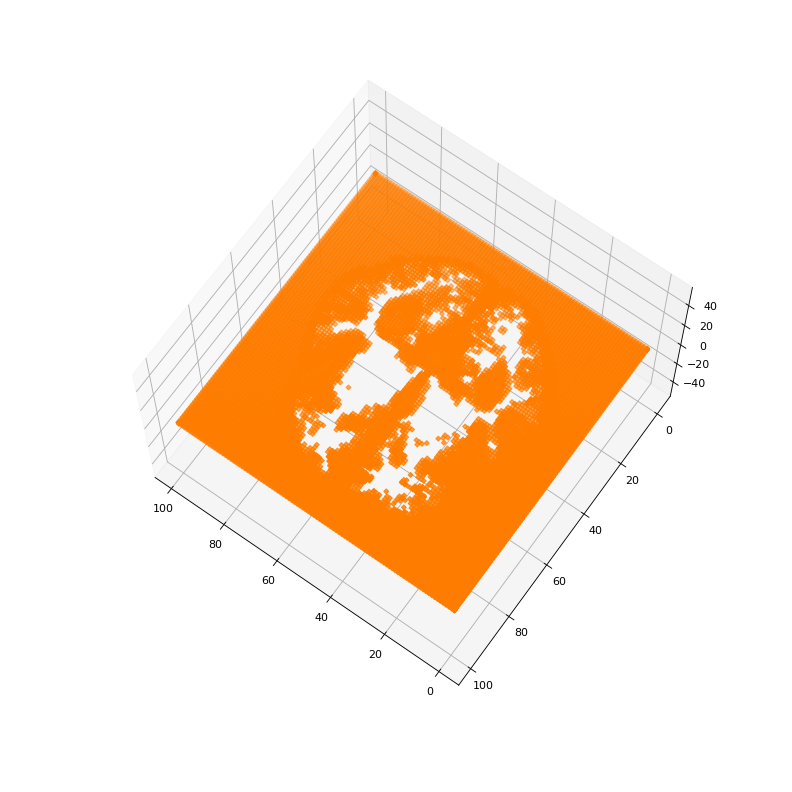

In [14]:
from pyntcloud import PyntCloud

pyCloud1 = PyntCloud.from_file("test2.ply")

pyCloud1.plot()